# レッスン の概要

ArcGIS Online のスマート マッピングを使用すると、簡単に美しいマップを作成できます。GIS でデータを分析し、スマート マッピングで、スマートなデフォルトを設定することで、イラストのようなマップをすばやく作成することができます。このレッスンでは、ArcGIS Notebooks で ArcGIS API for Python を使用してスマート マッピングを行い、美しいマップを作成する方法について学習します。コーディングによるアプローチと手動によるワークフローを比較するために、まず ArcGIS Online でスマート マッピングを使用して、ヒートマップ、属性をもとに色でフィーチャをシンボル表現をしたマップ、属性をもとに大きさでフィーチャをシンボル表現したマップなど、さまざまなマップの可視化を作成することから開始します。次に、ArcGIS API for Python を使用して、同じマップを ArcGIS Notebooks で作成します。最後に、スマート マッピングを使用して、ArcGIS Online でより複雑なシンボルを使用したマップを作成し、ArcGIS API for Python を使用してそれらのレイヤーのプロパティを確認します。

このレッスンでは、マップ上にプロットするフィーチャを視覚的に表現する方法を定義するデータ構造であるレンダラーについて学習します。JavaScript では、レンダラーは [JSON](https://www.json.org/json-en.html) のデータ構造で定義されます。Pythonでは、レンダラーを定義するデータ構造は辞書（ディクショナリ）です。ここでは、さまざまな種類のシンボルに対してレンダラーがどのように見えるかを学び、それをさまざまなフィーチャ レイヤーに適用していきます。このレッスンを修了すると、ArcGIS Online および ArcGIS Notebooks でのスマート マッピングの使用方法、スマート マッピングの仕組み、レンダラーの設定とフィーチャ レイヤーへの渡し方、および ArcGIS Online でのシンボル変更の仕組みについて、より深く理解できるようになります。

スマート マッピングに馴染みのない方は、[ArcGIS Online を使用して、データをわかりやすく表現したマップを作成する](https://learn.arcgis.com/ja/paths/mapping-and-visualization/) のレッスン パスをご覧ください。このレッスン パスで扱うスマート マッピングの種類については、[heatmaps (ヒートマップ)](https://arcgis-content.maps.arcgis.com/apps/Cascade/index.html?appid=ca7e12f6e8c0474bb4269889bda8ce41)、[color (色)](https://arcgis-content.maps.arcgis.com/apps/Cascade/index.html?appid=9ad60f8362a44a00ad5f52326edb1f2d)。 [color and size (色と大きさ)](https://www.arcgis.com/apps/Cascade/index.html?appid=cc8ed7ffcd5a4e329cdc552d6856abe4) を使用したスマート マッピングの方法に関する ArcGIS StoryMaps のストーリーを参照してください。また、このレッスンは [Learn Python with ArcGIS Notebooks](https://learn.arcgis.com/en/paths/learn-python-with-arcgis-notebooks/) レッスン パスの他のレッスンを基にしています。

このレッスンでは、次のようなことを行います。
* [ArcGIS Online でフィーチャをヒート マップで可視化する](#heatmap-agol)
* [ArcGIS Notebooks でフィーチャをヒート マップで可視化する](#heatmap-nb)
* [ArcGIS Online で属性を大きさで可視化する](#classed-size-agol)
* [ArcGIS Online で属性を色で可視化する](#classed-color-agol)
* [ArcGIS Online で属性を色と大きさで可視化する](#class-size-agol)
* [ArcGIS Notebooks で属性を大きさで可視化する](#classed-size-nb)
* [ArcGIS Notebooks で属性を色で可視化する](#classed-color-nb)
* [ArcGIS Notebooks でフィーチャのシンボルを変更する](#change-symb-agol)
* [ArcGIS Notebooks で複雑なシンボルを探索する](#web-map-in-nb)
* [チャレンジ](#challenge)

# ArcGIS Online でフィーチャをヒート マップで可視化する <a class="anchor" id="heatmap-agol"></a>

ヒート マップは、フィーチャの位置や分布を確認することができます。ヒート マップは、レイヤーのポイントを使用してポイントの相対密度を計算し、クール（ポイント密度が低い）からホット（ポイントが多い）まで滑らかに変化する色のセットで表示します。ヒート マップは、マップ上の多くのポイントが近接していたり、重なっていたりして、フィーチャを区別するのが難しい場合に特に有効です。また、ポイントを可視化する方法としても、非常に人気があり、魅力的です。

このレッスンでは、まず ArcGIS Online にある [Pasadena traffic collision data](https://learngis.maps.arcgis.com/home/item.html?id=79d3e458dcaf486f81c5591a67538179) からヒート マップを作成し、交通事故が多く発生する場所を把握します。

1. このノートブックから、**Options (オプション)** ボタンをクリックし、**Map (マップ)** を右クリックして、**Open link in new tab (リンクを新しいタブで開く)** をクリックすると、新しいタブでマップを開くことができます（翻訳者注釈：ご利用のブラウザにより、表示されるコンテキストメニューは異なります）。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/0b5d6f4e2f494035bc40755a47149152/data" width="300px" />

組織およびユーザーの設定によっては、Map Viewer Classic で開いている場合があるかと思います。ArcGIS Online では、マップの表示、利用、および作成用に 2 つのマップ ビューアーが用意されています。利用可能なマップ ビューアーと使用するマップ ビューアーの詳細については、こちらの [FAQ](https://doc.arcgis.com/ja/arcgis-online/reference/faq.htm#anchor36) をご参照ください。
このレッスンでは、Map Viewer Classic を使用します。
必要に応じて、**Open in Map Viewer Classic (Map Viewer Classic で開く)** をクリックします。


2. 新しいマップで、**Add (追加)** をクリックし、**Search for Layers (レイヤーの検索)** をクリックします。.

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/c86cbe1de8234934b0dec5e2f00894e9/data" width="200px" />

3. **ArcGIS Online** で *Pasadena Traffic Collisions* レイヤーを検索します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/1544876df1fa43e0ad0beb506de54b34/data" width="300px" />

4. add (追加)ボタンで **Traffic Collisions** レイヤーをマップに追加します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/a7fc0debf59d41c5b10450312779e3d8/data" width="300px" />  

← back (戻る) ボタンで add (追加)ペインを閉じ、**Content (コンテンツ)** をクリックします。

5. Web マップで、シンボルを変更します。レイヤー名の下の、**Change Style (スタイルの変更)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/dbfe534f88af4183aed04cb9b23c2ad5/data" width="300px" />


6. シンボルをヒート マップに変更するには、**Heat Map (ヒート マップ)** の下にある **Select (選択)** をクリックします。この操作により、ポイントフィーチャはすぐにヒート マップとして表示されます。明るい黄色のエリアは事故が多い道路を示し、拡散した水色の部分は事故が少ない道路を示しています。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/cc82849580e64a7a9faabad94cfa83a8/data" width="300px" />

7. オプションで、**Heat Map (ヒート マップ)** のプロパティを変更するには、**Options (オプション)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/88ae70ed72304b749408a40030994dd7/data" width="300px" />

8. ヒート マップのプロパティを変更し終えたら、**OK** をクリックし、**Done (完了)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/89619298e3664c0bb1e93306ff003844/data" width="260px" />

9. **Save (保存)** をクリックしてWeb マップを保存します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/6e516be9bd894440bb3a16c602bbe8ae/data" width="260px" />


10. マップにタイトル、タグ、サマリーをつけます。**タイトル** には、**Pasadena Traffic Heat Map** の後に自分のイニシャルを入れ、**Save Map (マップの保存)** をクリックします。

# ArcGIS Notebooks でフィーチャをヒート マップで可視化する <a class="anchor" id="heatmap-nb"></a>

スマート マッピングによって ArcGIS Online でヒート マップを作成する方法を確認したところで、[smart mapping capabilities in ArcGIS API for Python](https://developers.arcgis.com/python/guide/smart-mapping/) を使用して、同じデータでヒート マップを作成します。ArcGIS Notebooks の操作の基本を理解するために、このセクションを完了する前に [Hello, Notebook!](https://arcgis.com/home/item.html?id=5aee4d0f252941e1ae421b78a8ccbe60) のレッスンを完了することをお勧めします。まず、新しい ArcGIS Notebook を作成します。

1. **Home (ホーム)** をクリックし、**Notebook (ノートブック)** で右クリックして、Open link in new tab (リンクを新しいタブで開く) をクリックすると、新しいタブで **Notebooks** セクション を開始できます（翻訳者注釈：ご利用のブラウザにより、表示されるコンテキストメニューは異なります）。


2. **New Notebook (新しいノートブック)** をクリックし、ドロップダウン メニューから、**Standard** ランタイムを選択します。

3. ノートブックの最初のコード セルを実行して、GIS に接続し、スタートさせます。

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

4. ノートブックに **Pasadena Traffic Collisions** を追加するために、**Add (追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/8a0d4b86575a4704b83f802f81881e13/data" width="260px" />

5. 最初にノートブックで、**ArcGIS Online** 内から **Pasadena Traffic Collisions** を検索してください。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/19029edcbe1c46da924cc134e791bc67/data" width="300px" />

6. add (追加) でアイテムをノートブックに追加します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/803ca9e7f7a94b288879b92a06fab612/data" width="300px" />

6. 変数名を ```item``` から ```collisions``` に変更し、セルを実行します。

<Item title:"Traffic Collisions" type:Feature Layer Collection owner:Learn_ArcGIS>
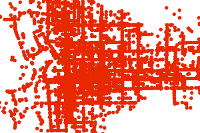

In [2]:
# Item Added From Toolbar
# Title: Traffic Collisions | Type: Feature Service | Owner: Learn_ArcGIS
collisions = gis.content.get("79d3e458dcaf486f81c5591a67538179")
collisions

6. 次のようなコードで、カリフォルニア州パサデナで、交通事故の発生状況を表示するマップ ビューを作成します。

In [3]:
traffic_map = gis.map('Pasadena, CA', zoomlevel=14)
traffic_map

MapView(layout=Layout(height='400px', width='100%'))

```zoomlevel``` パラメーターは、マップをどの程度まで拡大させるかを設定し、表示されるフィーチャの範囲や数に影響を与えます。

7. ```collisions``` をマップに追加するには、次のようなコードのように ```add_layer()``` を使います。

In [4]:
traffic_map.add_layer(collisions)

ArcGIS Online でマップにレイヤーを追加したときと同じように、マップに交通事故のポイントが表示されます。ArcGIS API for Python のスマート マッピング機能を使用すると、交通事故のポイントをヒート マップとしてレンダリングすることができます。  
次に、ヒート マップのレンダリング プロパティを指定する Python の辞書オブジェクト(dictionary object)を作成します。新しいコード セルに、```heat_map_renderer``` という名前の変数を作成します。

8. 次のコードのように、```heat_map_renderer``` 変数に、```{"renderer":"HeatmapRenderer", "opacity": 0.75}``` と定義した辞書をセットします。

In [5]:
heat_map_renderer = {"renderer":"HeatmapRenderer", "opacity": 0.75}

```opacity``` パラメーターはレイヤーの不透明度をコントロールします。75% の不透明度では、ベースマップの詳細がレイヤーを通して見えるようになります。

9. 次のコードのように、カリフォルニア州パサディナで別のマップ ビューを作成します。

In [6]:
traffic_heat_map = gis.map('Pasadena, CA', zoomlevel=14)
traffic_heat_map

MapView(layout=Layout(height='400px', width='100%'))

10. 前と同様のコードで、マップに ```collisions``` を追加します。今回は ```add_layer``` の 2 番目のパラメータとして ```heat_map_renderer``` オブジェクトを指定しています。

In [7]:
traffic_heat_map.add_layer(collisions, heat_map_renderer)

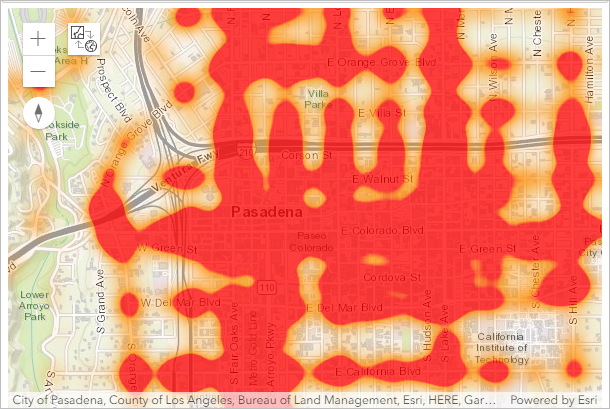

スマート マッピングはプラットフォームのいたる所で動作し、ArcGIS API for Python を使用した場合でも美しいマップを作成することができます。この ```heat_map_renderer``` 辞書（ディクショナリ）を指定することで、わずかなコードとパラメーターを使用して、ポイントをヒート マップに変換しています。  
次のステップでは、同様のレンダラー辞書オブジェクト(dictionary object)を使用して、フィーチャの属性に基づいてシンボルを変更することになります。

11. **Save (保存)** をクリックし、**Save As (名前を付けて保存)** をクリックして、ノートブックに *Pasadena Traffic Heat Map Notebook* と自分のイニシャルを付けます。  

12. タグとサマリーを追加し、**Save Notebook (ノートブックの保存)** をクリックします。  

13. 作成したノートブックを閉じます。

# ArcGIS Online で属性を大きさで可視化する<a class="anchor" id="classed-size-agol"></a>

このセクションでは、テキサス州ヒューストンの人口統計データのマップを作成します。このマップでは、フィーチャの大きさを国勢調査区の総人口でスケーリングすることにより、データを象徴的に表現します。これは、フィーチャ レイヤー内の属性の変動を表示する一般的な手法です。これによって、人口の多い地域と少ない地域を特定することができます。

1. このノートブックから、**Options (オプション)** ボタンをクリックし、**Map (マップ)** を右クリックして、**Open link in new tab (リンクを新しいタブで開く)** をクリックすると、新しいタブでマップを開くことができます（翻訳者注釈：ご利用のブラウザにより、表示されるコンテキストメニューは異なります）。

2. 新しいマップで、**Add (追加)** をクリックし、**Search for Layers (レイヤーの検索)** をクリックします。

3. **ArcGIS Online** 内で、*Houston Census Tract Demographics* レイヤー を検索します。

4.  **Houston Census Tract Demographics** レイヤーをマップに追加します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/a319478ba9c84925922aa7a5ce91f184/data" width="300px" />  


5. ←back (戻る) ボタンをクリックして追加 ペインを閉じ、**Content (コンテンツ)** をクリックします。

6. Web マップでシンボルを変更します。レイヤー名の下にある、**Change Style(スタイルの変更)** をクリックします。

7. **Choose an attribute to show (表示する属性を選択)** でドロップダウン メニューをクリックし、**Total Population (2019)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/6c908ad286204273a7f7a8cf82363264/data" width="300px" />

ヒューストンの国勢調査区はポリゴンからポイントに変化し、その大きさは総人口に比例します。以下のようになるでしょう。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/7974fc56f47c4133bf2ae8a70fc3c9c8/data" width="600px" />

8. シンボルの色などを設定するには、**Counts and Amounts (Size) (数と量(サイズ))** の下にある**Options (オプション)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/d7a4443af6fb4d8cb0653bb6da7adfc4/data" width="300px" />

9. シンボルの変更が終了したら、**Ok** と **Done (完了)** をクリックします。マップは閉じないでください。このまま作業を続けます。

# ArcGIS Online で属性を色で可視化する <a class="anchor" id="classed-color-agol"></a>

シンボルを変更して、ある属性の値に比例するようにフィーチャの大きさを設定する方法をご覧いただきました。次に、フィーチャの色を別の属性の値によって変化するように設定します。この方法は、フィーチャの形や大きさが異なる場合に有効です。

1. 同じWeb マップで、**Counts and Amounts (Color) (数と量(色))** の下にある **Select (選択)** をクリックしてスタイルを変更します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/06ab9413b60540678d4fd9f979b4ff37/data" width="300px" />

すると、国勢調査の対象地域が色分けされて表示され、人口の多い地域ほど濃い色で表示されます。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/7f8a400ab3c547fca841f23279e93e5b/data" width="600px" />

2. 色やクラス分けを変更する場合は、**Options (オプション)** をクリックします。それ以外の場合は、Web マップを開いたまま、次のセクションに進みます。 
3. **OK** をクリックして、Counts and Amounts (Color) options (数と量(色)) を閉じます。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/6f2c5c5096fd46d0b6e645ac38a883ea/data" width="260px" />

# ArcGIS Online で属性を色と大きさで可視化する  <a class="anchor" id="class-size-agol"></a>

ArcGIS Online では、複数の変数を表示するシンボルを作成することができます。このセクションでは、ヒューストンの人口統計データを、**総人口:Total Population (2019)** と **所有/貸借の総世帯数:Total Owner/Renter Households (ACS 2013 - 2017)** の 2つの属性でシンボル化します。**総人口:Total Population (2019)** と **所有/貸借の総世帯数:Total Owner/Renter Households (ACS 2013 - 2017)** と相関していることが分かると思います。同じヒューストンの国勢調査区人口統計のWeb マップで、複数の変数をレンダリングするためにシンボルを変更します。

1. **Total Population (2019)** 属性の下で、**Add attribute (属性の追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/6b093327e3724f149fb77417707ef5a0/data" width="240px" />


2. **Total Owner/Renter Households (ACS 2013 - 2017)** を選択します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/90c020ef8ba84cf19d8cda057eabf5c1/data" width="240px" />


3. シンボルが変更されたら、**Done (完了)** をクリックします。  

マップのシンボルが変わります。  
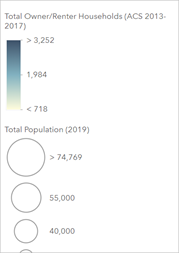

4. **Save (保存)** をクリックし、Web マップを保存します。

4. タイトル、タグ、サマリーをつけてください。**タイトル** には、*Houston Demographics Two Variables* の後にイニシャルを入れてください。このマップを後でまた見ることになります。マップはこのようになります。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/ccbea44d35fa46d5b365f07666f70c98/data" width="600px" />

Web マップ では、大きなドットは一般的に色が濃くなっていることが分かります。これは、人口が多い地域は、世帯数も多いことを表しています。ヒューストンのダウンタウンなどドットが小さい地域は色が薄くなっています。これは、人口の少ない地域は世帯数が少ないことを表しています。

# ArcGIS Notebooks で属性を大きさで可視化する <a class="anchor" id="classed-size-nb"></a>

ArcGIS API for Python のスマート マッピング機能を使用すると、ArcGIS Online と同じシンボルを適用することができます。ArcGIS API for Python では、ヒューストン国勢調査の人口統計データを表示するために使用する ClassedSizeRenderer と ClassedColorRenderer が公開されています。ClassedSizeRenderer は、フィーチャクラスの選択された属性に基づいてシンボルの大きさを変更します。ClassedColorRenderer は、フィーチャクラスで選択された属性に基づいてシンボルの色を変更します。このセクションでは、ArcGIS API for Python を使用して、前のセクションで行った作業を再現します。これに関してのもう一つのよい入門書は、ArcGIS API for Python のサンプル ノートブック [Chennai Floods 2015 – A Geographic Analysis](https://developers.arcgis.com/python/sample-notebooks/chennai-floods-analysis/) です。

1. **Home (ホーム)** をクリックし、**Notebook (ノートブック)** で右クリックして、Open link in new tab (リンクを新しいタブで開く) をクリックすると、新しいタブで **Notebooks** セクション を開始できます（翻訳者注釈：ご利用のブラウザにより、表示されるコンテキストメニューは異なります）。  
**New Notebook (新しいノートブック)** をクリックし、ドロップダウン メニューから、**Standard** ランタイムを選択します。

2. ノートブックの最初のコードセルを実行して、GISに接続し、スタートさせます。

In [8]:
from arcgis.gis import GIS
gis = GIS("home")

3. **ArcGIS Online** で、**Houston Census Tract Demographics** レイヤーを検索し、コードスニペットをノートブックに追加してください。

4. 変数名を、```item``` から ```demographics``` に変更します。

<Item title:"Houston Census Tract Demographics" type:Feature Layer Collection owner:Learn_ArcGIS>
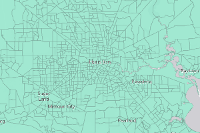

In [9]:
# Item Added From Toolbar
# Title: Houston Census Tract Demographics | Type: Feature Service | Owner: Learn_ArcGIS
demographics = gis.content.get("69016c145246426bb13cd90c92b3118d")
demographics

5. コードセルを実行します。

6. コードセルに、レンダラー辞書を定義する ```classed_size_renderer``` という名前の変数を作成します。

7. ```classed_size_renderer =  {"renderer":"ClassedSizeRenderer", "field_name":"TOTPOP_CY" }``` と宣言し、セルを実行します。これによって、レンダラーが "ClassedSizeRenderer" 、表示する属性が "TOTPOP_CY" (**Total Population (2019)**) と定義されます。

In [10]:
classed_size_renderer =  {"renderer":"ClassedSizeRenderer", "field_name":"TOTPOP_CY" }

8. テキサス州ヒューストンで、マップ ビュー を作成します。

In [11]:
demographic_totpop_map = gis.map('Houston, TX')
demographic_totpop_map

MapView(layout=Layout(height='400px', width='100%'))

9. ヒューストンの国勢調査の人口統計の項目をマップに追加します。このレイヤーには ```classed_size_renderer``` を使用するように指定します。

In [12]:
demographic_totpop_map.add_layer(demographics, classed_size_renderer)

10. マップ上のポイントをクリックします。これらのポイントには、ポップアップが表示され、属性値を確認することができます。

このマップは、ArcGIS Online のクラス分けされた大きさでのレンダラー（ArcGIS Online で属性を大きさで可視化する）を使用して作成したマップと比較してどうですか？同じですか？国勢調査の境界線が見えないと、この地図を解釈するのは難しいかもしれません。  
次のセクションでは、同じフィーチャを ClassedColorRenderer を使用して可視化します。

# ArcGIS Notebooks で属性を色で可視化する <a class="anchor" id="classed-color-nb"></a>

ClassedSizeRenderer から ClassedColorRenderer に変更することで、総人口に応じた色で、郡別の **総人口:Total Population (2019)** を表示するマップにすることができます。

1. 新しいコードセルで、```classed_color_renderer``` という名前の変数を定義します。

2. この変数に ```classed_size_renderer``` で使ったのと同じ辞書を設定し、"ClassedSizeRenderer" を "ClassedColorRenderer" に変更した後、セルを実行します。 

In [13]:
classed_color_renderer =  {"renderer":"ClassedColorRenderer", "field_name":"TOTPOP_CY" }

3. テキサス州ヒューストンでマップ ビューを作成し、それを表示します。 

In [14]:
demographic_totpop_map = gis.map('Houston, TX')
demographic_totpop_map

MapView(layout=Layout(height='400px', width='100%'))

4. ヒューストンの国勢調査の人口統計の項目をマップに追加し、クラス分けされた色のレンダラー（ClassedColorRenderer）を適用します。

In [15]:
demographic_totpop_map.add_layer(demographics, classed_color_renderer)

5. 別の属性を表示するため、レンダラーの辞書の ```"field_name"``` を変更します。レンダラー辞書を作成し、```rent_own_classed_color_renderer``` と名前をつけます。

6. ```"field_name```" を "OwnerRenter_HHs" と設定し、セルを実行します。

In [16]:
rent_own_classed_color_renderer =  {"renderer":"ClassedColorRenderer", "field_name":"OwnerRenter_HHs" }

7. テキサス州ヒューストンでマップ ビューを作成し、それを表示します。

In [17]:
demographic_rent_own_map = gis.map('Houston, TX')
demographic_rent_own_map

MapView(layout=Layout(height='400px', width='100%'))

8. ヒューストンの国勢調査の人口統計の項目を地図に追加し、新しくクラス分けされたカラーレンダラーを適用します。

In [18]:
demographic_rent_own_map.add_layer(demographics, rent_own_classed_color_renderer)

このデータを使った ClassedSizeRenderer と ClassedColorRenderer のどちらのレンダラーが好みでしょうか?

9. 作業中のノートブックを保存し、そのまま開いておきます。次のセクションで同じレイヤーを使って作業を行います。

# ArcGIS Notebooks でフィーチャのシンボルを変更する <a class="anchor" id="change-symb-agol"></a>

スマート マッピングの使用方法を理解したところで、ArcGIS API for Python を使用してフィーチャ レイヤーのレンダラーに直接アクセスする方法を検討します。すべてのフィーチャ レイヤーには、アクセスおよび変更可能なデフォルトのシンボルがあります。ここでは、レンダラー オブジェクトにアクセスする方法を学びます。その構造を見て、それを修正し、そして修正されたシンボルでマップ上にフィーチャ レイヤーを表示します。ヒューストンの人口統計データを調べるのに使ったのと同じノートブックで作業してください。

[レンダラー](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=renderer#arcgis.features.FeatureLayer.renderer) は、レイヤーのプロパティです。サービス内のそれぞれのレイヤーのレンダラーにアクセスすることができます


1. ```demographics.layer[0].renderer```.を使用して、人口統計レイヤーのレンダラーを表示します。

In [19]:
demographics.layers[0].renderer

{'type': 'simple', 'symbol': {'color': [150, 231, 205, 255], 'outline': {'color': [107, 158, 142, 121], 'width': 0.75, 'type': 'esriSLS', 'style': 'esriSLSSolid'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}}

レンダラーはPython の辞書（ディクショナリ）です。辞書のキーを使ってレンダラーのさまざまな値にアクセスすることができます。シンボルのプロパティには ```'symbol'``` キーを使ってアクセスします。

2.  次のセルに ```demographics.layers[0].renderer['symbol']``` を追加し、セルを実行します。

In [20]:
demographics.layers[0].renderer['symbol']

{'color': [150, 231, 205, 255], 'outline': {'color': [107, 158, 142, 121], 'width': 0.75, 'type': 'esriSLS', 'style': 'esriSLSSolid'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}

3. シンボルの色を ```item.layers[0].renderer['symbol']['color']``` で表示します。

In [21]:
demographics.layers[0].renderer['symbol']['color']

[150, 231, 205, 255]

4. アウトラインの色を ```item.layers[0].renderer['symbol']['outline']['color']``` で表示します。

In [22]:
demographics.layers[0].renderer['symbol']['outline']['color']

[107, 158, 142, 121]

色の配列の値は、赤, 青, 緑, アルファ（透明度）チャンネルの値に対応しています。

5. テキサス州ヒューストンのマップ ビューを作成します。

In [23]:
houston_map = gis.map("Houston, TX")
houston_map

MapView(layout=Layout(height='400px', width='100%'))

6.  レンダラーを指定せずにノートブックのマップにヒューストンの国勢調査の人口統計の項目を追加して、デフォルトのシンボルがどのように見えるかを確認することができます。

In [24]:
houston_map.add_layer(demographics)

レンダラーで直接値を変更することができます。値を変更することで、マップ上のレイヤーの表示方法が変わります。次に、国勢調査のアウトラインの色と塗りつぶしの色を変更します。

7. シンボルカラー ```[150, 231, 205, 255]``` とアウトラインカラー ```[107, 158, 142, 121]``` の4要素リストの値を変更します。この値は 0 から 255 の間でなければなりません。これは ```item.layers[0].renderer['symbol']['outline']['color']``` を最初の配列に、 ```item.layers[0].renderer['symbol']['color']``` を2番目の配列に設定することで実現できます。

In [25]:
demographics.layers[0].renderer['symbol']['outline']['color'] = [255, 0, 0, 255]
demographics.layers[0].renderer['symbol']['color'] = [255, 100, 50, 255]

8. テキサス州ヒューストンのマップ ビューを作成します。

In [26]:
houston_new_symb = gis.map('Houston, TX')
houston_new_symb

MapView(layout=Layout(height='400px', width='100%'))

10. ヒューストンの国勢調査の人口統計レイヤーをマップに追加します。

In [27]:
houston_new_symb.add_layer(demographics)

レイヤーの色が変わりましたか？戻ってカラー配列の値を他のものに変えてから、マップとレイヤーを再表示してみてください。

# ArcGIS Notebooks で複雑なシンボルを探索する <a class="anchor" id="web-map-in-nb"></a>

スマート マッピングを使用すると、フィーチャ レイヤーへのシンボルの適用が簡単になります。[ArcGIS Online で属性を大きさで可視化する](#class-size-agol) のセクションでは、"OwnerRenter_HHs" と "TOTPOP_CY" という 2 つの属性を使用して、フィーチャを視覚化するシンボルが作成されています。このセクションでは、そのレンダラー オブジェクトがどのように見えるかを確認します。

1. ノートブックの左上にある **Add (追加)** をクリックします。

2. **My Content (マイコンテンツ)** で、**Houston Demographics Two Variables YOURINITIALS** のwebマップ を検索してください。

3. ArcGIS Notebooks にそのweb マップ を追加します。

<Item title:"Houston Demographics Two Variables" type:Web Map owner:gbrunner_LearnGIS>
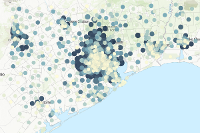

In [28]:
# Item Added From Toolbar
# Title: Houston Demographics Two Variables | Type: Web Map | Owner: gbrunner_LearnGIS
item = gis.content.get("766ce48a4f534130b30a163c833c974e")
item

4. セルを実行します。

5. レンダラーを見るために、```item.get_data()['operationalLayers'][0]['layerDefinition']['drawingInfo']``` を使ってください。  

In [29]:
item.get_data()['operationalLayers'][0]['layerDefinition']['drawingInfo']

{'renderer': {'visualVariables': [{'type': 'colorInfo',
    'field': 'OwnerRenter_HHs',
    'valueExpression': None,
    'stops': [{'value': 718, 'color': [255, 252, 212, 255], 'label': '< 718'},
     {'value': 1351, 'color': [177, 205, 194, 255], 'label': None},
     {'value': 1984, 'color': [98, 158, 176, 255], 'label': '1,984'},
     {'value': 2618, 'color': [56, 98, 122, 255], 'label': None},
     {'value': 3252, 'color': [13, 38, 68, 255], 'label': '> 3,252'}]},
   {'type': 'sizeInfo',
    'field': 'TOTPOP_CY',
    'valueExpression': None,
    'valueUnit': 'unknown',
    'minSize': {'type': 'sizeInfo',
     'expression': 'view.scale',
     'valueExpression': '$view.scale',
     'stops': [{'value': 4513, 'size': 12},
      {'value': 9027, 'size': 12},
      {'value': 1155582, 'size': 6},
      {'value': 2311162, 'size': 3},
      {'value': 9244649, 'size': 1.5}]},
    'maxSize': {'type': 'sizeInfo',
     'expression': 'view.scale',
     'valueExpression': '$view.scale',
     'stops

レンダラーを探索すると、シンボルに使用するフィールド、クラスの分類、その他 Webマップでのフィーチャの表示方法を定義するすべての情報を見ることができます。これは複雑ですが、貴重な情報でもあります。ArcGIS API for Python を使用して、このレンダラーをレイヤーに適用することができます。

6. テキサス州ヒューストンの別のマップ ビューを作成します。 

In [30]:
houston_multivalue_map = gis.map('Houston, TX')
houston_multivalue_map

MapView(layout=Layout(height='400px', width='100%'))

7. ヒューストンの国勢調査の人口統計の項目をマップに追加します。今回はレンダラーとして、```item.get_data()['operationalLayers'][0]['layerDefinition']['drawingInfo']``` を指定します。

In [30]:
houston_multivalue_map.add_layer(demographics, item.get_data()['operationalLayers'][0]['layerDefinition']['drawingInfo'])

ArcGIS Online の Web マップのレイヤーに適用されているレンダラーを他のフィーチャに使用することができます。

# 要約 <a class="anchor" id="summary"></a>

このレッスンでは、スマート マッピングについて、また、ArcGIS API for Python のスマート マッピング機能を使用して ArcGIS Notebooks で美しいマップを作成する方法について学習しました。また、レイヤーのシンボルを定義するパラメータを保持する構造体であるレンダラーについても学びました。ArcGIS API for Python を使ったマップデータの可視化についてより深く知りたい方は、[Smart Mapping](https://developers.arcgis.com/python/guide/smart-mapping/) 、[Safe Streets to Schools](https://developers.arcgis.com/python/sample-notebooks/safe-streets-to-schools/)、[Working with Web Maps and Web Scenes](https://developers.arcgis.com/python/guide/working-with-web-maps-and-web-scenes/) のサンプル ノートブックをご覧ください。自分の知識を試したい場合は、以下の **チャレンジ** 問題に挑戦してください。

# チャレンジ <a class="anchor" id="challenge"></a>

1. ArcGIS Online または ArcGIS 組織でポイント フィーチャ レイヤーを検索し、ArcGIS Notebooks を使用してそのレイヤーからヒート マップを作成します。
2. ArcGIS Online または ArcGIS 組織でポリゴン フィーチャ レイヤーを検索し、ArcGIS Notebooks を使用してそこから ClassedSizeRenderer と ClassedColorRenderer を使った2つのマップを作成します。
3. この課題は3つの部分からなります。 
  - 最初に、ArcGIS Online でシンボルとして **Counts and Amounts (Color) (数と量(色))** を使用して **Total Population (2019)** による **Houston Census Tract Demographics** を表示するマップを作成し、そのマップを保存してください。
  - 2番目は、ArcGIS Notebooks でWeb マップ からそのレイヤーを読み込み、そのシンボルを使用して **Houston Census Tracts Demographics** を表示します。
  - 3番目は、レンダラーでフィーチャの色を変更し、再度マップを表示します。